# 전국 신규 민간 아파트 분양가격 동향
## 부동산 가격 변동추세가 아파트 분양가에도 반영될까?

* melt,concat,pivot,tranpose 와 같은 reshape 기능을 활용하기 
* groupby,pivot_table, info, describe, value_counts 를 통해 데이터 요약 & 분석
* 수치형, 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화 하기

In [2]:
import pandas as pd

In [3]:
df_last=pd.read_csv("주택도시보증공사_전국 평균 분양가격(2019년 12월).csv",encoding="euc-kr")

In [4]:
df_last.shape

(4335, 5)

In [5]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [6]:
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


In [7]:
df_first = pd.read_csv("전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv",encoding="euc-kr")

In [8]:
df_first.shape

(17, 22)

In [9]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [10]:
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [11]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [12]:


df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [13]:
df_last["분양가격"]=pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')

In [14]:

df_last["분양가격"].min()

1868.0

In [15]:

df_last["평당분양가격"] = df_last["분양가격"]*3.3
df_last


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN


In [16]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [17]:
df_last["분양가격(㎡)"].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [18]:
df_last["분양가격"].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

In [19]:
df_last["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [20]:
df_last["전용면적"]=df_last["규모구분"].str.replace("전용면적","")
df_last["전용면적"]=df_last["전용면적"].str.replace("초과","~")
df_last["전용면적"]=df_last["전용면적"].str.replace("이하","")
df_last["전용면적"]=df_last["전용면적"].str.replace(" ","").str.strip()

In [21]:
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
0,서울,전체,2015,10,5841,5841.0,19275.3,전체


In [22]:
df_last=df_last.drop(["규모구분","분양가격(㎡)"], axis=1)

In [23]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [24]:
df_last.groupby(['지역명'])['평당분양가격'].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [25]:
df_last.groupby(['전용면적'])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [26]:
df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean().unstack().round()

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.0,7567.0,7486.0,8750.0,7478.0
경기,14772.0,13252.0,12524.0,13678.0,12560.0
경남,10358.0,8689.0,8619.0,10018.0,8659.0
경북,9157.0,7883.0,8061.0,8774.0,8079.0
광주,11042.0,9431.0,9911.0,9296.0,9904.0
대구,13087.0,11992.0,11779.0,11141.0,11771.0
대전,14877.0,9176.0,9711.0,9037.0,9786.0
부산,13208.0,11354.0,11865.0,12073.0,11936.0
서울,23446.0,23213.0,22787.0,25944.0,22610.0


In [27]:
pd.pivot_table(df_last, index=['지역명'],values=["평당분양가격"],aggfunc="mean")

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [28]:
p=pd.pivot_table(df_last, index=["연도","지역명"],values="평당분양가격")
p.loc[2017]

,평당분양가격
지역명,
강원,7273.560000
경기,12304.980000
경남,8786.760000
경북,8280.800000
광주,9613.977551
대구,12206.700000
대전,9957.158491
부산,11560.680000
서울,21831.060000


<AxesSubplot:>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


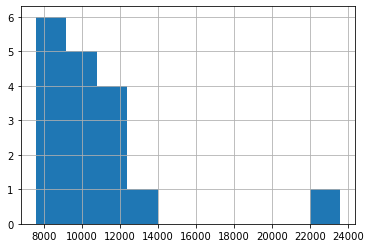

In [29]:
import matplotlib.pyplot as plt
plt.rc("font",family="AppleGothic")

g = df_last.groupby(["지역명"])["평당분양가격"].mean()
g.hist()

<AxesSubplot:xlabel='연도'>

C:\Users\hyeji\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hyeji\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


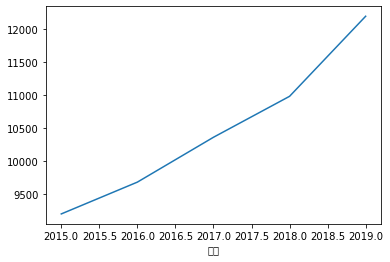

In [30]:
df_last.groupby(["연도"])["평당분양가격"].mean().plot()

In [31]:
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

<AxesSubplot:>

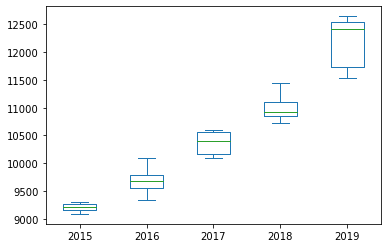

In [32]:
df_last.pivot_table(index="월",columns="연도",values="평당분양가격").plot.box()

In [33]:
plt.rc('font', family='Malgun Gothic')

<AxesSubplot:>

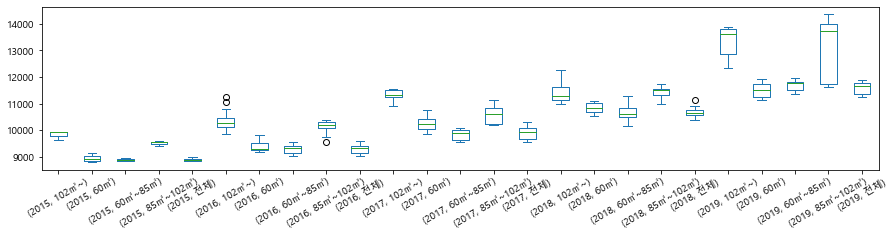

In [34]:
p=df_last.pivot_table(index="월",columns=["연도","전용면적"],values="평당분양가격")
p.plot.box(figsize=(15,3),rot = 30)

In [35]:
plt.rc('font', family='Malgun Gothic')

<AxesSubplot:xlabel='월'>

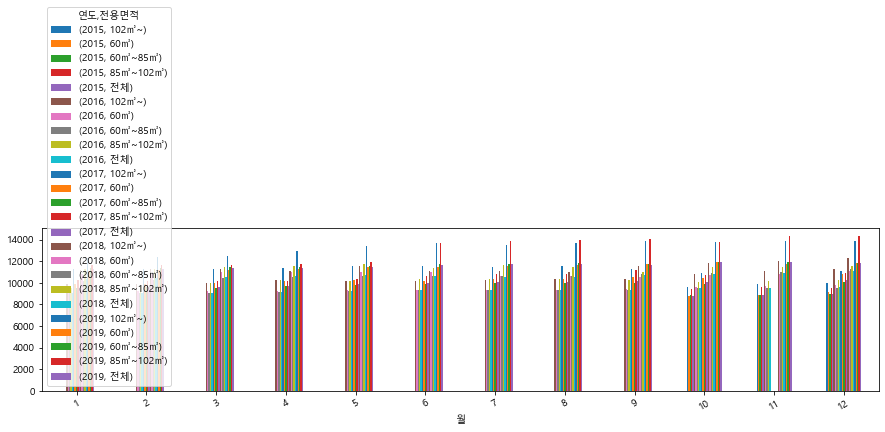

In [36]:
p.plot.bar(figsize=(15,3),rot = 30)

### seaborn을 이용하여 시각화하기

In [37]:
import seaborn as sns

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

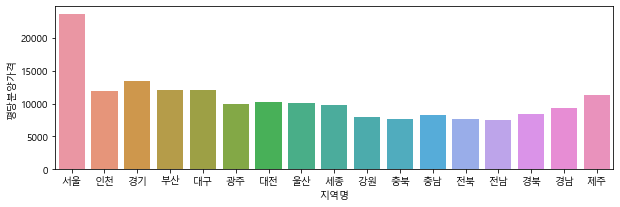

In [38]:
plt.figure(figsize=(10,3))
sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci=None)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

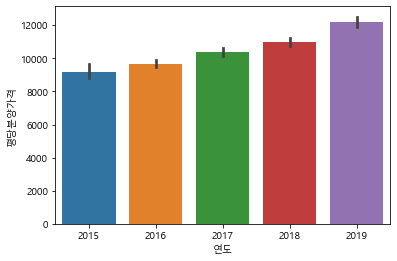

In [39]:
sns.barplot(data=df_last, x="연도", y="평당분양가격")

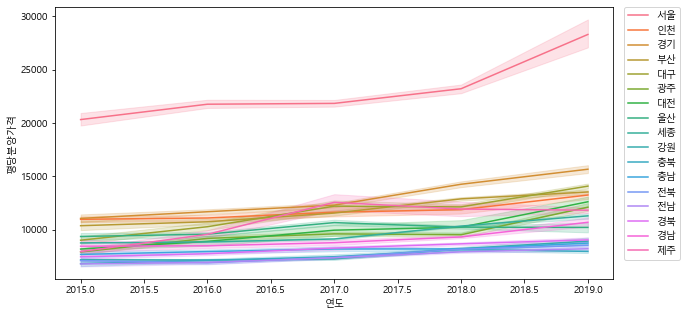

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격",hue="지역명")
plt.legend(bbox_to_anchor=(1.02,1), loc=2,borderaxespad=0.)

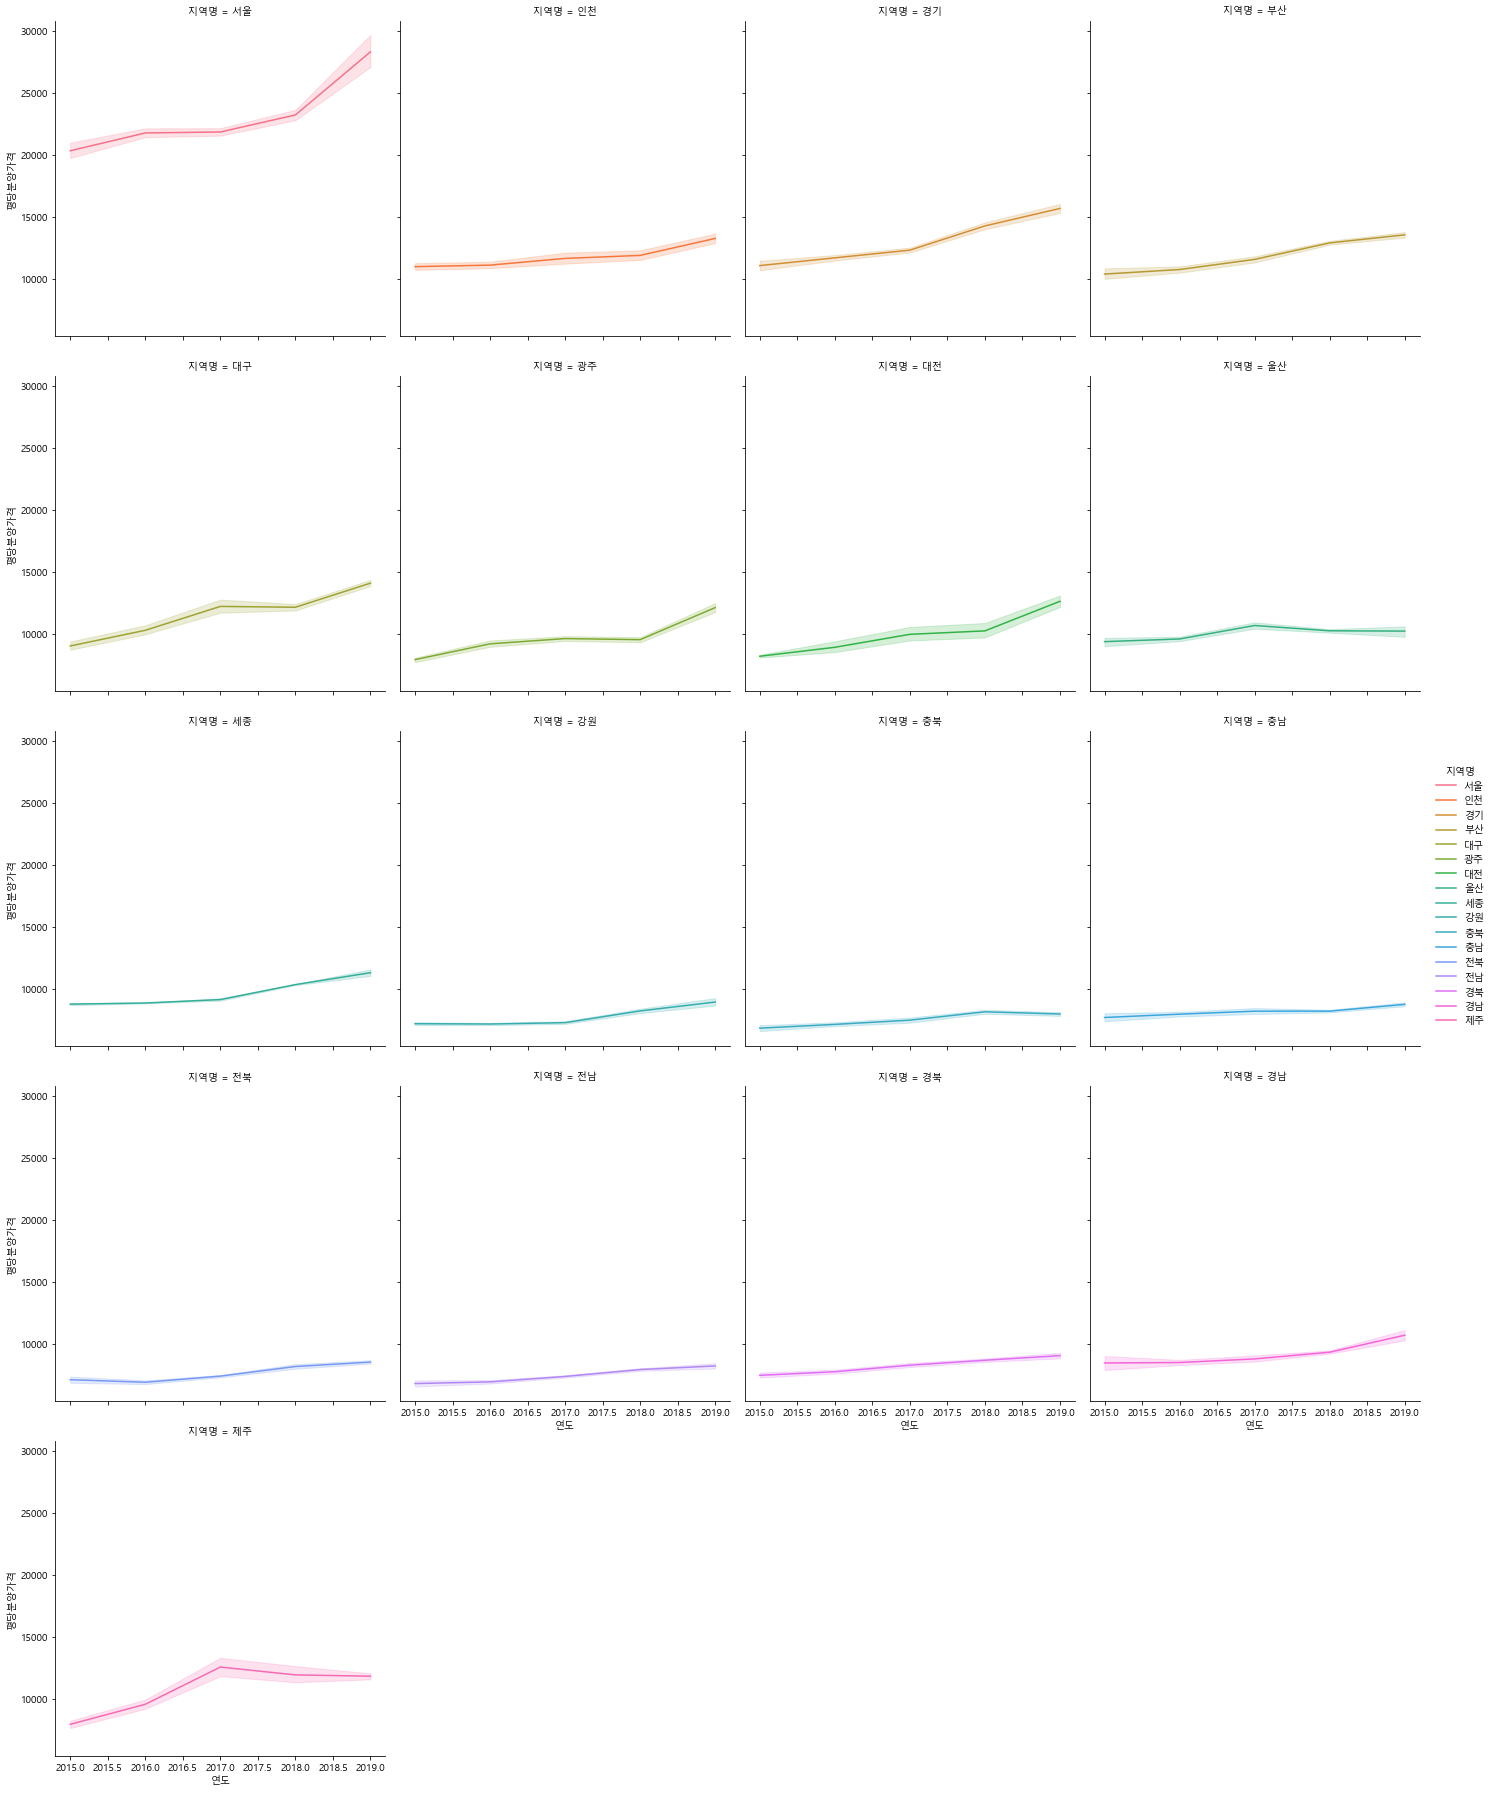

In [41]:
sns.relplot(data=df_last, x="연도", y="평당분양가격",hue="지역명",kind="line",col="지역명",col_wrap=4)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

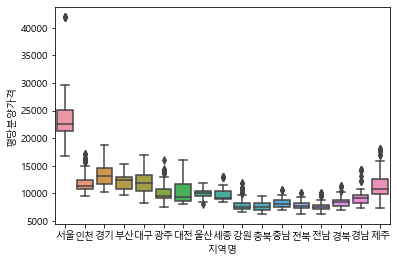

In [42]:
sns.boxplot(data=df_last, x="지역명",y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

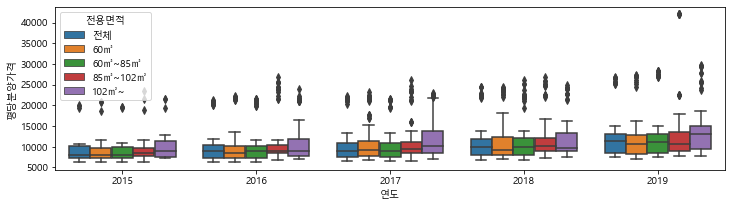

In [43]:
plt.figure(figsize=(12,3))
sns.boxplot(data=df_last, x="연도" , y="평당분양가격", hue="전용면적")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

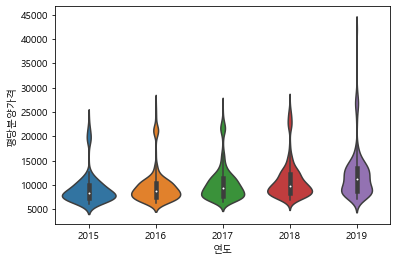

In [44]:
sns.violinplot(data=df_last,x="연도",y="평당분양가격")

### lmplot과 swarmplot

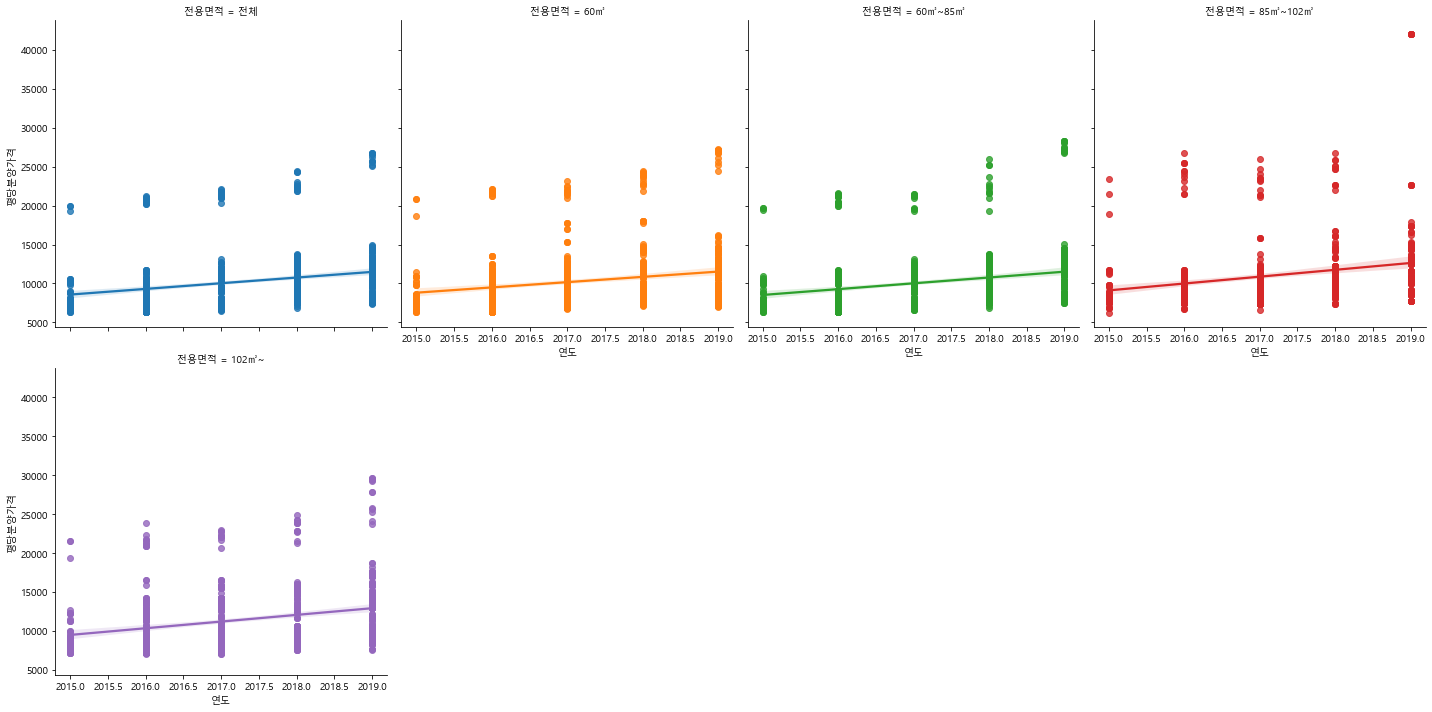

In [45]:
#regplot에서 hue 값 사용하고 싶을 때 lmplot
sns.lmplot(data=df_last, x="연도", y="평당분양가격",hue="전용면적",col="전용면적",col_wrap=4)

C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

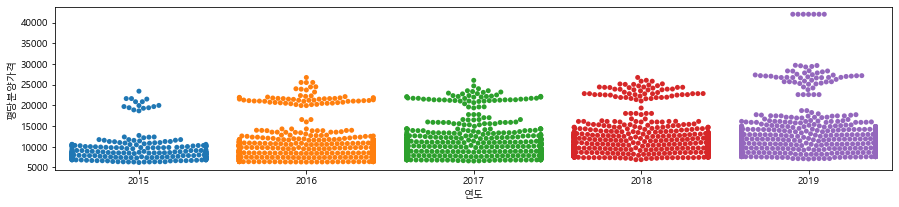

In [46]:
plt.figure(figsize=(15,3))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격")

In [47]:
df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [48]:
max_price = df_last["평당분양가격"].max()

In [49]:
df_last[df_last["평당분양가격"] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


### 수치데이터 히스토그램 그리기

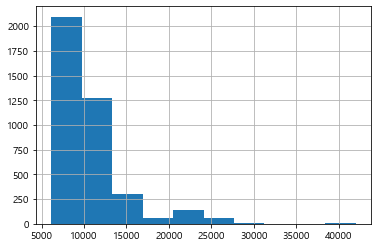

In [50]:
#결측치가 없는 데이터만 모아서시각화
h = df_last["평당분양가격"].hist()

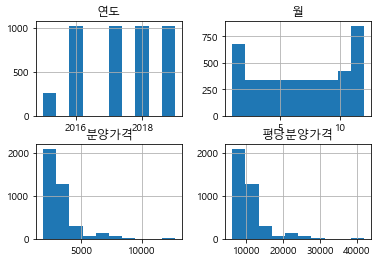

In [51]:
h = df_last.hist()

In [52]:
price = df_last.loc[df_last["평당분양가격"].notnull(),"평당분양가격"]

C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

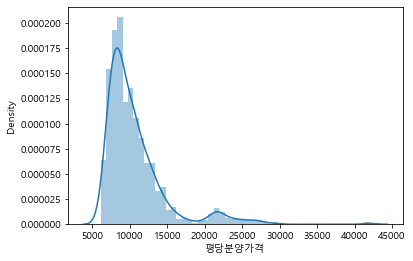

In [53]:
sns.distplot(price)

C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hyeji\Anaconda3\lib\site-pack

C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Pl

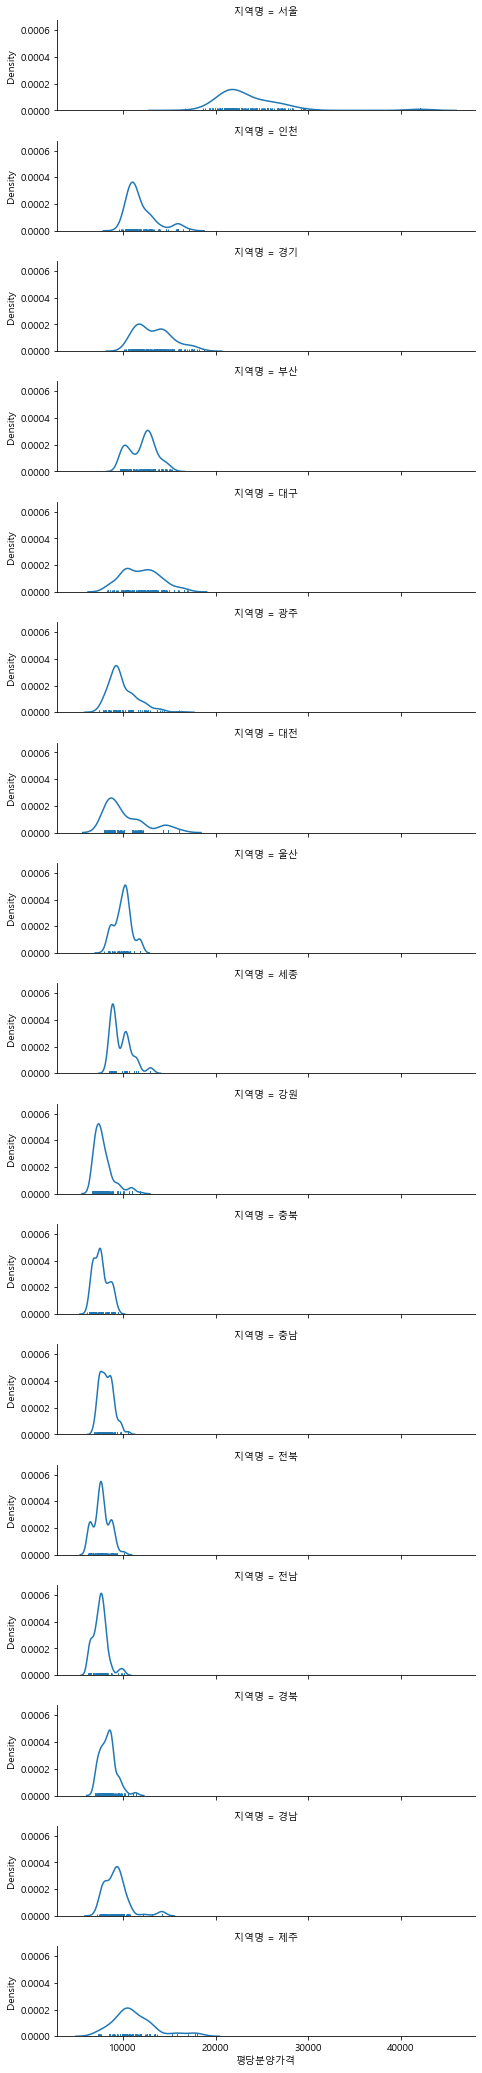

In [54]:
#subplot 으로 표현row_order=ordered_day
g = sns.FacetGrid(df_last, row="지역명",
                 height=1.7, aspect=4)
g.map(sns.distplot,"평당분양가격", hist=False,rug=True);

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

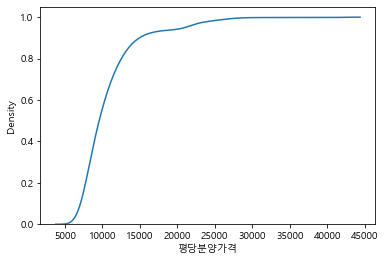

In [55]:
#sns.distplot(price, hist=False, rug=True)
#sns.kdeplot(price)
sns.kdeplot(price,cumulative=True)

In [60]:
#pairplot
#df_last_notnull = df_last[df_last["평당분양가격"].notnull(),
                          ["연도","월"]
#sns.pairplot(df_last,hue="지역명")

IndentationError: unexpected indent (2991904017.py, line 3)

In [61]:
df_last["전용면적"].value_counts()

전체          867
60㎡         867
60㎡~85㎡     867
85㎡~102㎡    867
102㎡~       867
Name: 전용면적, dtype: int64

In [62]:
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [63]:
pd.options.display.max_columns = 25

In [64]:
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,8493,8627,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,10501,10397,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,8527,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [65]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [66]:
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [67]:
df_first_melt=df_first.melt(id_vars="지역",var_name="기간",value_name="평당분양가격")
df_first_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


### melt. 연도와 월을 분리하기

In [68]:
date = "2013년 12월"
date

'2013년 12월'

In [69]:
date.split("년")

['2013', ' 12월']

In [70]:
date.split("년")[-1].replace("월","")

' 12'

In [71]:
def parse_year(date):
    year = date.split("년")[0]
    year = int(year)
    return year

parse_year(date)


2013

In [72]:
def parse_month(date):
    month = date.split("년")[-1].replace("월","")
    month = int(month)
    return month

In [73]:
parse_month(date)

12

In [74]:
#연도만 추출해서 새로운 컬럼에 담음
df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)
df_first_melt.head(1)

,지역,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [75]:
df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)
df_first_melt.head(1)

,지역,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [76]:
df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
1643,광주,2017,5,2880.0,9504.0,85㎡~102㎡


### 두개의 데이터 합치기

In [77]:
#데이터 셋 가져오고 싶을땐 감싸기
df_last[df_last["전용면적"] == "전체"]

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
5,인천,2015,10,3163.0,10437.9,전체
10,경기,2015,10,3138.0,10355.4,전체
15,부산,2015,10,3112.0,10269.6,전체
20,대구,2015,10,2682.0,8850.6,전체
...,...,...,...,...,...,...
4310,전북,2019,12,2468.0,8144.4,전체
4315,전남,2019,12,2452.0,8091.6,전체
4320,경북,2019,12,2914.0,9616.2,전체
4325,경남,2019,12,3063.0,10107.9,전체


In [78]:
cols = ['지역명','연도','월','평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [79]:
df_last_prepare = df_last.loc[df_last["전용면적"] == "전체", cols]
df_last_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3


In [80]:
df_first_melt.head(1)
df_first_melt.columns = ['지역명','기간','평당분양가격','연도','월']
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [81]:
df_first_prepare = df_first_melt[cols].copy()
df_first_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189


In [82]:
#concat으로 data합치기 - cols를 모두 같게 할것

df = pd.concat([df_first_prepare, df_last_prepare])
df.head()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0


In [83]:
df["연도"].value_counts(sort=False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

### pivot_table 사용하기

In [84]:
#평균값을 데이터 프레임으로!
t=pd.pivot_table(df, index="연도",columns="지역명",values="평당분양가격").round()

<AxesSubplot:xlabel='지역명', ylabel='연도'>

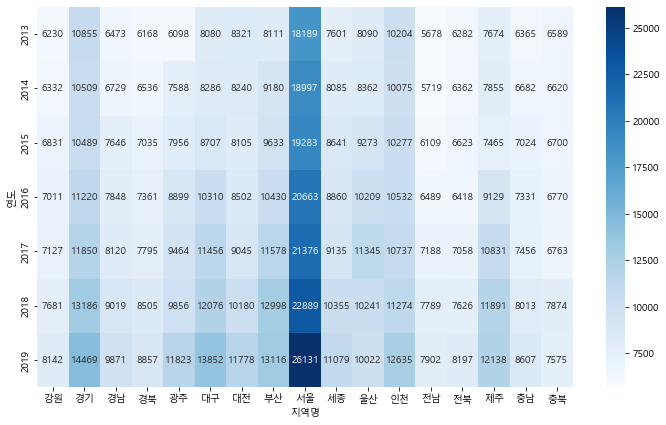

In [85]:
plt.figure(figsize=(12,7))
sns.heatmap(t,cmap="Blues",annot=True, fmt=".0f")

In [86]:
t.T

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8142.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14469.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9871.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8857.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11823.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13852.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11778.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13116.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,26131.0


<AxesSubplot:xlabel='연도', ylabel='지역명'>

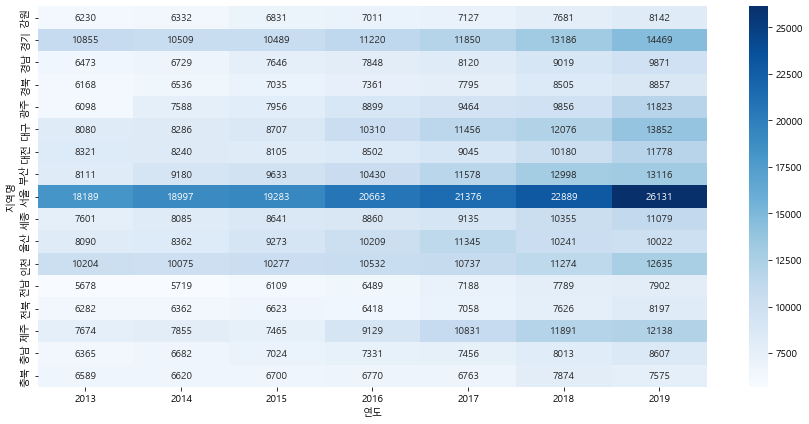

In [87]:
plt.figure(figsize=(15,7))
sns.heatmap(t.T,cmap="Blues",annot=True, fmt=".0f")

In [89]:
t=pd.pivot_table(df, index="연도", columns="지역명")

<AxesSubplot:xlabel='None-지역명', ylabel='연도'>

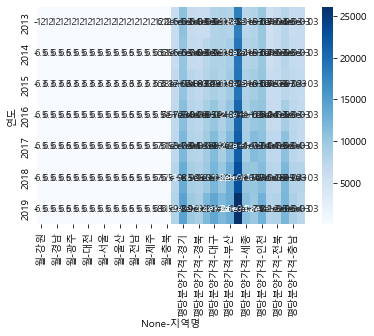

In [94]:
sns.heatmap(t,cmap="Blues",annot = True)

<AxesSubplot:xlabel='None-지역명', ylabel='연도'>

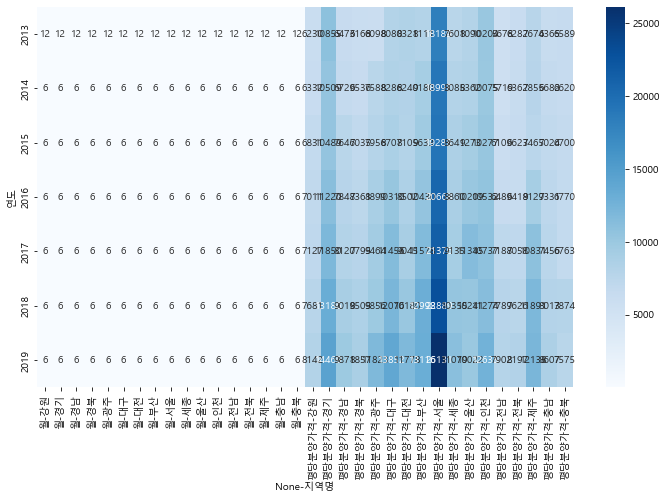

In [97]:
plt.figure(figsize=(12,7))
sns.heatmap(t,cmap="Blues",annot = True,fmt=".0f")

In [98]:
t.transpose()

연도             2013          2014          2015       2016     2017  \
       지역명                                                            
월      강원      12.0      6.500000      6.272727      6.500      6.5   
       경기      12.0      6.500000      6.272727      6.500      6.5   
       경남      12.0      6.500000      6.272727      6.500      6.5   
       경북      12.0      6.500000      6.272727      6.500      6.5   
       광주      12.0      6.500000      6.272727      6.500      6.5   
       대구      12.0      6.500000      6.272727      6.500      6.5   
       대전      12.0      6.500000      6.272727      6.500      6.5   
       부산      12.0      6.500000      6.272727      6.500      6.5   
       서울      12.0      6.500000      6.272727      6.500      6.5   
       세종      12.0      6.500000      6.272727      6.500      6.5   
       울산      12.0      6.500000      6.272727      6.500      6.5   
       인천      12.0      6.500000      6.272727      6.500      6.5   
       전남      12.0      6.500000      6.272727      6.500      6.5   
       전북      12.0      6.500000      6.272727      6.500      6.5   
       제주      12.0      6.500000      6.272727      6.500      6.5   
       충남      12.0      6.500000      6.272727      6.500      6.5   
       충북      12.0      6.500000      6.272727      6.500      6.5   
평당분양가격 강원    6230.0   6332.500000   6831.154545   7011.125   7126.8   
       경기   10855.0  10509.083333  10489.109091  11220.000  11850.0   
       경남    6473.0   6728.750000   7646.163636   7847.950   8119.8   
       경북    6168.0   6536.500000   7035.063636   7360.650   7794.9   
       광주    6098.0   7587.833333   7956.090909   8898.725   9463.5   
       대구    8080.0   8286.083333   8706.718182  10310.025  11455.8   
       대전    8321.0   8240.333333   8104.509091   8501.625   9044.7   
       부산    8111.0   9180.166667   9633.272727  10429.925  11577.9   
       서울   18189.0  18997.250000  19282.600000  20663.500  21375.9   
       세종    7601.0   8085.333333   8641.227273   8860.500   9135.3   
       울산    8090.0   8361.666667   9273.336364  10208.550  11345.1   
       인천   10204.0  10074.833333  10276.845455  10532.500  10736.7   
       전남    5678.0   5718.916667   6109.263636   6488.625   7187.7   
       전북    6282.0   6362.333333   6623.290909   6417.950   7057.8   
       제주    7674.0   7855.166667   7465.327273   9129.175  10830.9   
       충남    6365.0   6681.583333   7024.490909   7330.675   7456.2   
       충북    6589.0   6620.000000   6699.572727   6770.225   6762.6   

연도               2018       2019  
       지역명                        
월      강원       6.500      6.500  
       경기       6.500      6.500  
       경남       6.500      6.500  
       경북       6.500      6.500  
       광주       6.500      6.500  
       대구       6.500      6.500  
       대전       6.500      6.500  
       부산       6.500      6.500  
       서울       6.500      6.500  
       세종       6.500      6.500  
       울산       6.500      6.500  
       인천       6.500      6.500  
       전남       6.500      6.500  
       전북       6.500      6.500  
       제주       6.500      6.500  
       충남       6.500      6.500  
       충북       6.500      6.500  
평당분양가격 강원    7680.750   8141.650  
       경기   13185.975  14468.850  
       경남    9019.450   9870.850  
       경북    8505.200   8856.650  
       광주    9855.725  11822.800  
       대구   12075.800  13852.025  
       대전   10180.225  11777.700  
       부산   12997.875  13116.400  
       서울   22889.350  26131.050  
       세종   10354.850  11078.925  
       울산   10241.400  10022.100  
       인천   11273.900  12634.875  
       전남    7789.100   7902.400  
       전북    7625.750   8196.650  
       제주   11890.725  12137.950  
       충남    8012.675   8606.950  
       충북    7874.075   7574.600

In [100]:
#groupby로 그리기
g=df.groupby(["연도","지역명"])["평당분양가격"].mean().unstack().round()

<AxesSubplot:xlabel='연도', ylabel='지역명'>

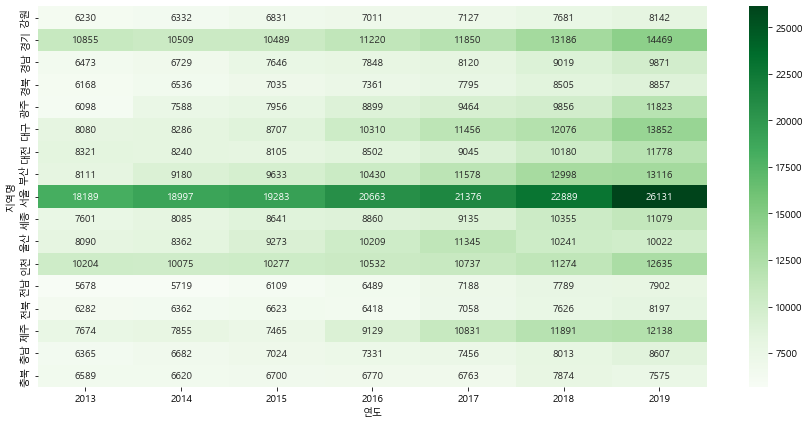

In [104]:
plt.figure(figsize=(15,7))
sns.heatmap(g.T,annot=True,fmt=".0f",cmap="Greens")

### 시각화하기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

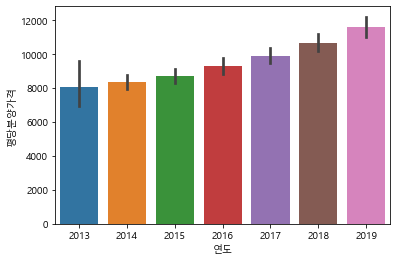

In [106]:
#barplot
sns.barplot(data=df, x="연도",y="평당분양가격")

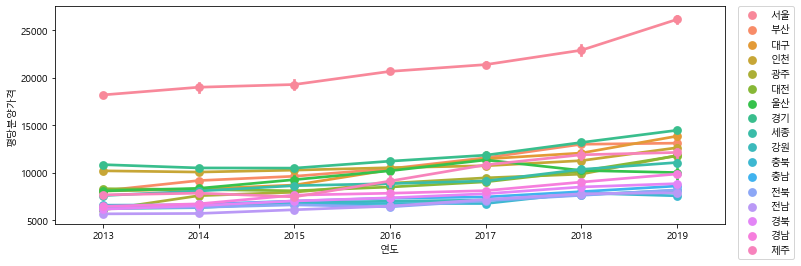

In [110]:
plt.figure(figsize=(12,4))
sns.pointplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.)

(72, 4)


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

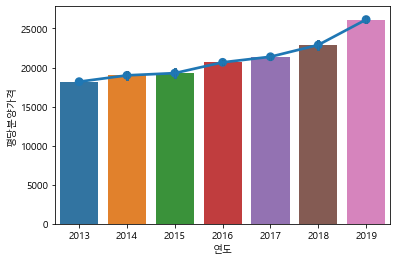

In [115]:
df_seoul = df[df["지역명"] == "서울"].copy()
print(df_seoul.shape)

sns.barplot(data=df_seoul,x="연도",y="평당분양가격")
sns.pointplot(data=df_seoul,x="연도",y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

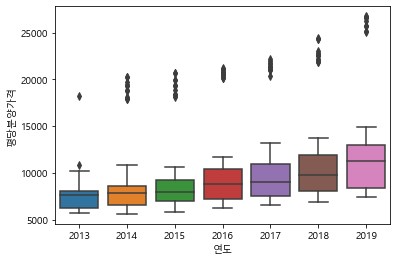

In [116]:
sns.boxplot(data=df,x="연도",y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

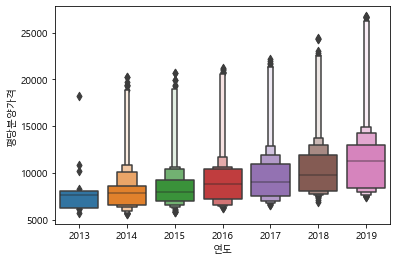

In [117]:
sns.boxenplot(data=df,x="연도",y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

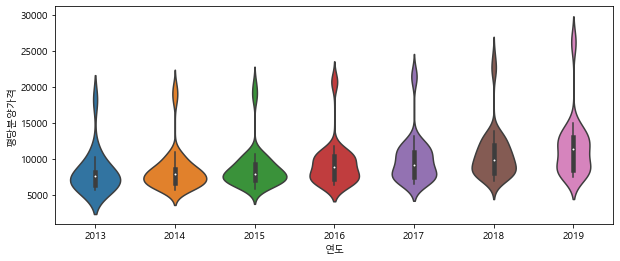

In [119]:
#violinplot
plt.figure(figsize=(10,4))
sns.violinplot(data=df, x="연도", y="평당분양가격")

C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.7% of the points

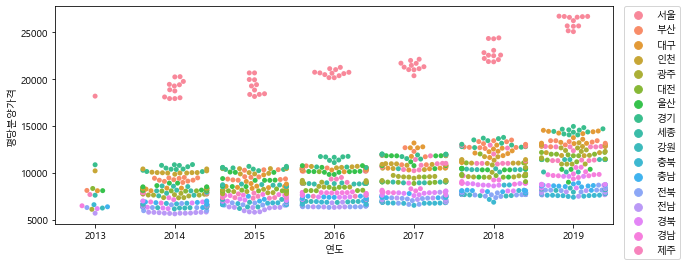

In [122]:
# swarmplot그리기
plt.figure(figsize=(10,4))
sns.swarmplot(data=df, x="연도", y="평당분양가격",hue="지역명")
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

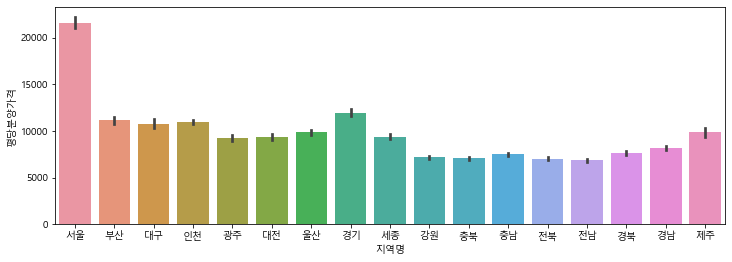

In [124]:
plt.figure(figsize=(12,4))
sns.barplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

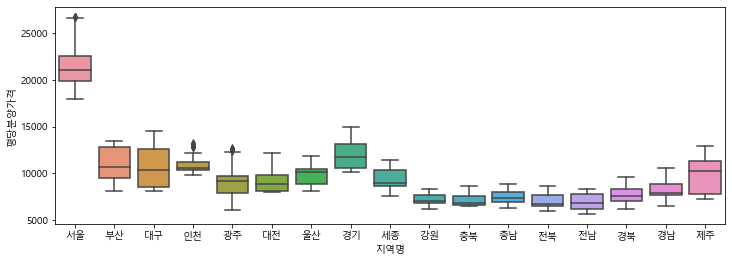

In [125]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

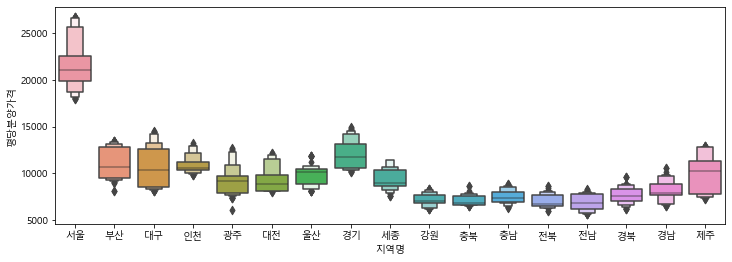

In [126]:
plt.figure(figsize=(12,4))
sns.boxenplot(data=df, x="지역명", y="평당분양가격")

C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hyeji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

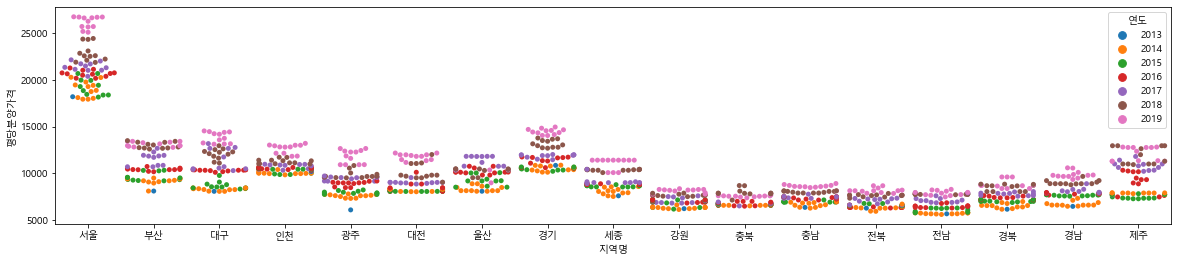

In [128]:
plt.figure(figsize=(20,4))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", hue="연도")